In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from spectres import spectres
from scipy.constants import c as speed_of_light
from tqdm import tqdm
import prodimopy.read as pread
from numba import njit
from scipy.stats import kendalltau, spearmanr, pearsonr

In [3]:
def total_flux(wl, flux_nu):
    """
    Calculate the total flux over the wavelengths and returns the flux in erg cm^-2 s^-1
    """
    flux_lambda = (speed_of_light * 100 / ((wl * 1e-4) ** 2)) * flux_nu * 1e-23
    tot_flux = np.trapezoid(flux_lambda, (wl * 1e-4))
    return tot_flux

In [4]:
with open('FLiTsData1000_N.pkl', 'rb') as f:
    df = pickle.load(f)

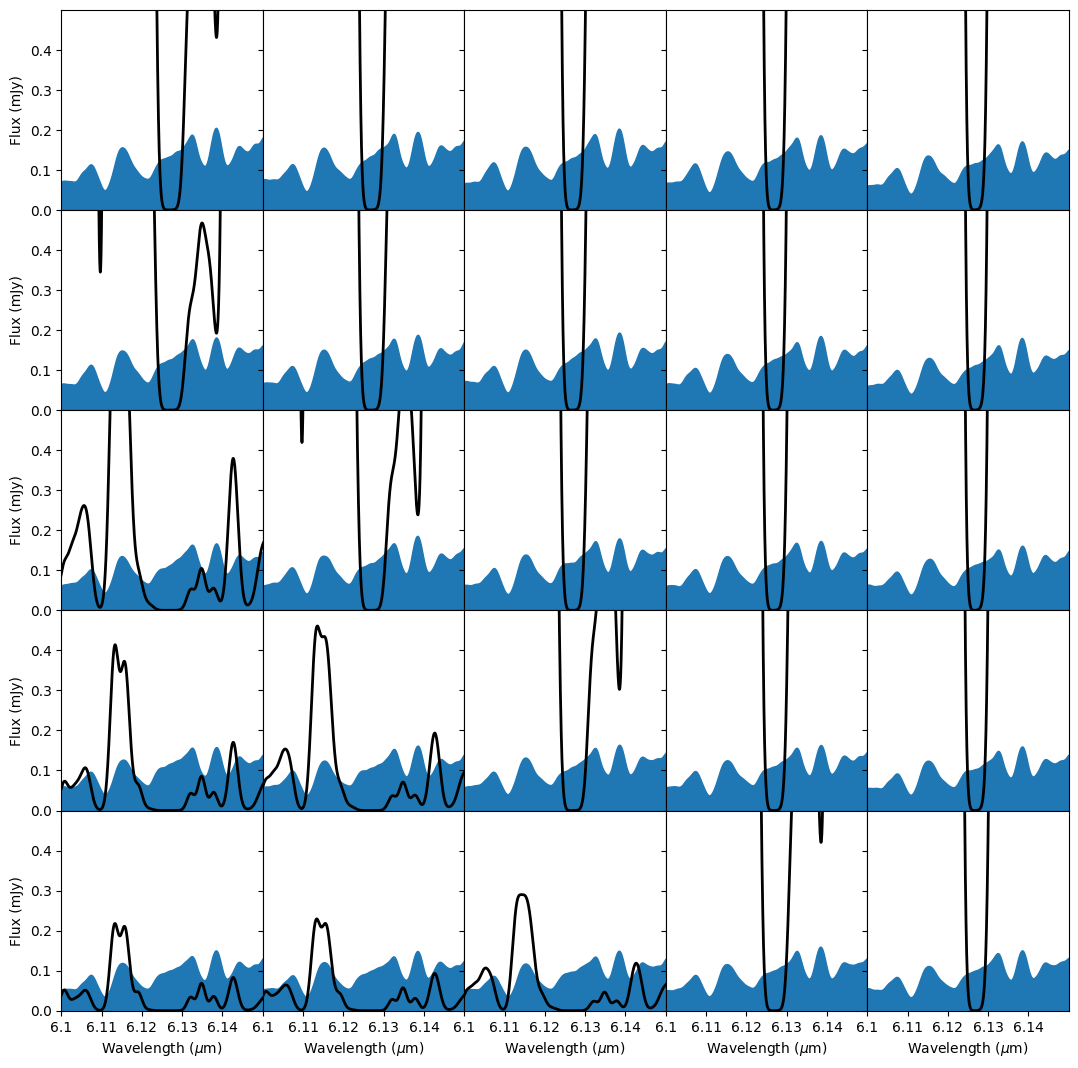

In [5]:
# %matplotlib notebook
plt.close('all')
total_spec = None
cmap = mpl.colormaps.get_cmap('tab20')
# fig, ax = plt.subplots(figsize=(14, 5))
species = ['C2H2','CH4', 'CO', 'CO2', 'H2O', 'HCN',  'NO', 'O2', 'OH','NH3']
# species = ['atomic', 'CH4',  'CO', 'CO2', 'HCN', 'NH3', 'NO', 'O2', 'OH']
species =['NH3']
fig = plt.figure(figsize=(13, 13))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row').flatten()
xrange=[6.1, 6.15]
yrange=[0,0.5]
num_xticks = 6
num_yticks = 6
for i in range(25):
    n_row, n_col = divmod(i, 5)
    total_spec = None
    # fig, ax = plt.subplots(figsize=(14, 5))
    model = df['Model Name'][i]
    FLiTs_wl = df.loc[df['Model Name'] == model, 'FLiTs Wavelength'].values[0].copy()
    FLiTs_flux = df.loc[df['Model Name'] == model, 'FLiTs Flux'].values[0].copy()
    for index, specie in enumerate(species):
        specie_wl = df.loc[df['Model Name'] == model, f'FLiTs {specie} Wavelength'].values[0].copy()
        specie_flux = df.loc[df['Model Name'] == model, f'FLiTs {specie} Flux'].values[0].copy()
        new_specie_flux = np.interp(FLiTs_wl, specie_wl, specie_flux, left=0, right=0)
        if total_spec is None:
            total_spec = new_specie_flux
        else:
            total_spec += new_specie_flux
        axes[i].fill_between(FLiTs_wl, 0, total_spec*1000, label=specie, zorder=len(species) - index+1,
                        color=cmap(index / len(species)))
        # ax.fill_between(specie_wl,0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
        #                 color=cmap(index / len(species)))
        # new_flux = np.interp(FLiTs_wl, specie_wl, specie_flux)
        # ax.plot(FLiTs_wl, np.log10(new_flux/FLiTs_flux+1))
        # axes[i].plot(FLiTs_wl, new_specie_flux*1000)
    axes[i].plot(FLiTs_wl, FLiTs_flux*1000, c='black', lw=2, label='FLiTs', zorder=20)
    # ax.plot(specie_wl, specie_flux)
    # ax.plot(total_FLiTs_wl, interp_flux*1000, color='grey', zorder=30)
    # fig.suptitle(model)
    axes[i].set_xlim(xrange)
    axes[i].set_ylim(yrange)
    if n_col == 0:
        axes[i].set_ylabel("Flux (mJy)")
        axes[i].set_yticks(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
        axes[i].set_yticklabels(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
    if n_row == 4:
        axes[i].set_xlabel(r"Wavelength ($\mu$m)")
        axes[i].set_xticks(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
        axes[i].set_xticklabels(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
plt.show()

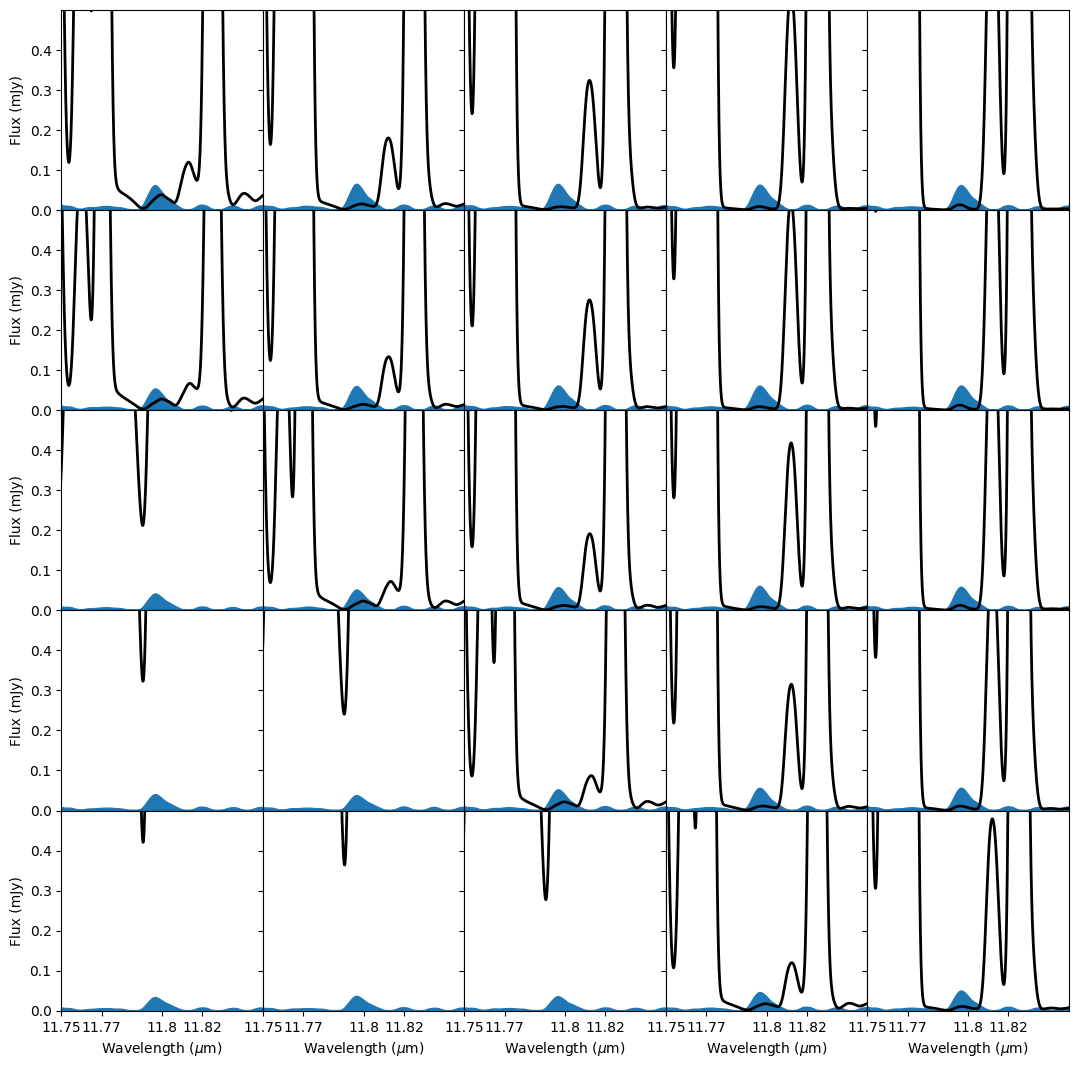

In [6]:
# %matplotlib notebook
plt.close('all')
total_spec = None
cmap = mpl.colormaps.get_cmap('tab20')
# fig, ax = plt.subplots(figsize=(14, 5))
species = ['C2H2','CH4', 'CO', 'CO2', 'H2O', 'HCN',  'NO', 'O2', 'OH','NH3']
# species = ['atomic', 'CH4',  'CO', 'CO2', 'HCN', 'NH3', 'NO', 'O2', 'OH']
species =['NH3']
fig = plt.figure(figsize=(13, 13))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row').flatten()
xrange=[11.75, 11.85]
yrange=[0,0.5]
num_xticks = 5
num_yticks = 6
for i in range(25):
    n_row, n_col = divmod(i, 5)
    total_spec = None
    # fig, ax = plt.subplots(figsize=(14, 5))
    model = df['Model Name'][i]
    FLiTs_wl = df.loc[df['Model Name'] == model, 'FLiTs Wavelength'].values[0].copy()
    FLiTs_flux = df.loc[df['Model Name'] == model, 'FLiTs Flux'].values[0].copy()
    for index, specie in enumerate(species):
        specie_wl = df.loc[df['Model Name'] == model, f'FLiTs {specie} Wavelength'].values[0].copy()
        specie_flux = df.loc[df['Model Name'] == model, f'FLiTs {specie} Flux'].values[0].copy()
        new_specie_flux = np.interp(FLiTs_wl, specie_wl, specie_flux, left=0, right=0)
        if total_spec is None:
            total_spec = new_specie_flux
        else:
            total_spec += new_specie_flux
        axes[i].fill_between(FLiTs_wl, 0, total_spec*1000, label=specie, zorder=len(species) - index+1,
                        color=cmap(index / len(species)))
        # ax.fill_between(specie_wl,0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
        #                 color=cmap(index / len(species)))
        # new_flux = np.interp(FLiTs_wl, specie_wl, specie_flux)
        # ax.plot(FLiTs_wl, np.log10(new_flux/FLiTs_flux+1))
        # axes[i].plot(FLiTs_wl, new_specie_flux*1000)
    axes[i].plot(FLiTs_wl, FLiTs_flux*1000, c='black', lw=2, label='FLiTs', zorder=20)
    # ax.plot(specie_wl, specie_flux)
    # ax.plot(total_FLiTs_wl, interp_flux*1000, color='grey', zorder=30)
    # fig.suptitle(model)
    axes[i].set_xlim(xrange)
    axes[i].set_ylim(yrange)
    if n_col == 0:
        axes[i].set_ylabel("Flux (mJy)")
        axes[i].set_yticks(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
        axes[i].set_yticklabels(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
    if n_row == 4:
        axes[i].set_xlabel(r"Wavelength ($\mu$m)")
        axes[i].set_xticks(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
        axes[i].set_xticklabels(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)

plt.show()

6.125, 11.8

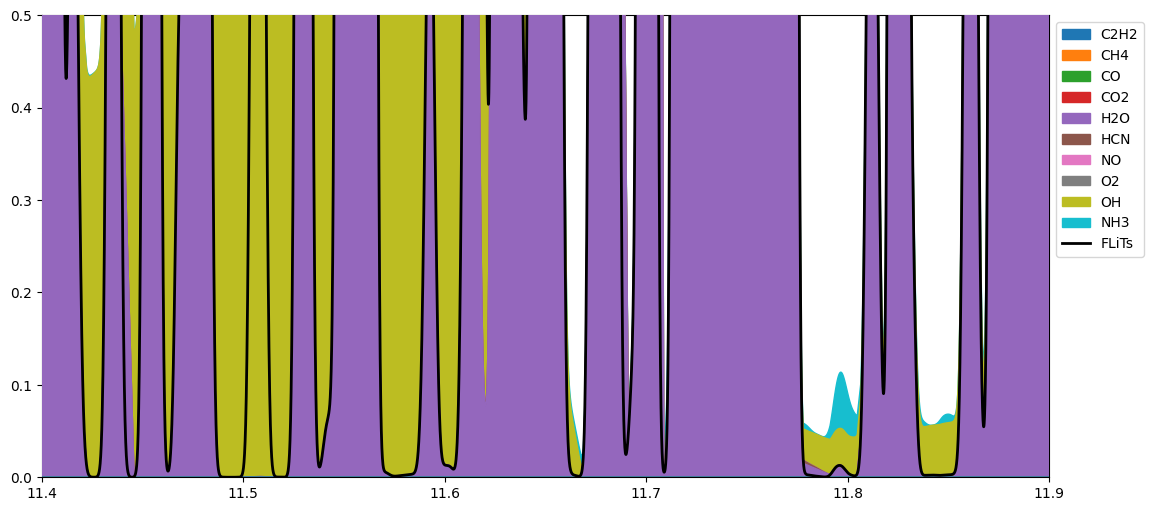

In [7]:
fig, ax = plt.subplots(figsize=(13, 6))
total_spec = None
cmap = mpl.colormaps.get_cmap('tab20')
# fig, ax = plt.subplots(figsize=(14, 5))
model = df['Model Name'][4]
FLiTs_wl = df.loc[df['Model Name'] == model, 'FLiTs Wavelength'].values[0].copy()
FLiTs_flux = df.loc[df['Model Name'] == model, 'FLiTs Flux'].values[0].copy()
species = ['C2H2','CH4', 'CO', 'CO2', 'H2O', 'HCN',  'NO', 'O2', 'OH','NH3']
# species = ['NH3']
xrange=[11.4, 11.9]
yrange=[0,0.5]
for index, specie in enumerate(species):
    specie_wl = df.loc[df['Model Name'] == model, f'FLiTs {specie} Wavelength'].values[0].copy()
    specie_flux = df.loc[df['Model Name'] == model, f'FLiTs {specie} Flux'].values[0].copy()
    new_specie_flux = np.interp(FLiTs_wl, specie_wl, specie_flux, left=0, right=0)
    if total_spec is None:
        total_spec = new_specie_flux
    else:
        total_spec += new_specie_flux
    ax.fill_between(FLiTs_wl, 0, total_spec*1000, label=specie, zorder=len(species) - index+1,
                    color=cmap(index / len(species)))
    # ax.fill_between(specie_wl,0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
    #                 color=cmap(index / len(species)))
    # new_flux = np.interp(FLiTs_wl, specie_wl, specie_flux)
    # ax.plot(FLiTs_wl, np.log10(new_flux/FLiTs_flux+1))
    # axes[i].plot(FLiTs_wl, new_specie_flux*1000)
ax.plot(FLiTs_wl, FLiTs_flux*1000, c='black', lw=2, label='FLiTs', zorder=20)
# ax.plot(specie_wl, specie_flux)
# ax.plot(total_FLiTs_wl, interp_flux*1000, color='grey', zorder=30)
# fig.suptitle(model)
ax.set_xlim(xrange)
ax.set_ylim(yrange)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

        atomic   CH4    CO   CO2   H2O   HCN   NH3    NO    O2    OH
atomic    1.00  0.27  0.30 -0.35 -0.08  0.11  0.01  0.05 -0.09 -0.04
CH4       0.27  1.00  0.25 -0.67 -0.65  0.67 -0.34 -0.60 -0.67 -0.61
CO        0.30  0.25  1.00 -0.20  0.02  0.02 -0.27  0.02  0.02  0.03
CO2      -0.35 -0.67 -0.20  1.00  0.63 -0.70  0.16  0.49  0.69  0.58
H2O      -0.08 -0.65  0.02  0.63  1.00 -0.92  0.51  0.84  0.87  0.93
HCN       0.11  0.67  0.02 -0.70 -0.92  1.00 -0.43 -0.77 -0.89 -0.87
NH3       0.01 -0.34 -0.27  0.16  0.51 -0.43  1.00  0.61  0.40  0.57
NO        0.05 -0.60  0.02  0.49  0.84 -0.77  0.61  1.00  0.77  0.89
O2       -0.09 -0.67  0.02  0.69  0.87 -0.89  0.40  0.77  1.00  0.83
OH       -0.04 -0.61  0.03  0.58  0.93 -0.87  0.57  0.89  0.83  1.00


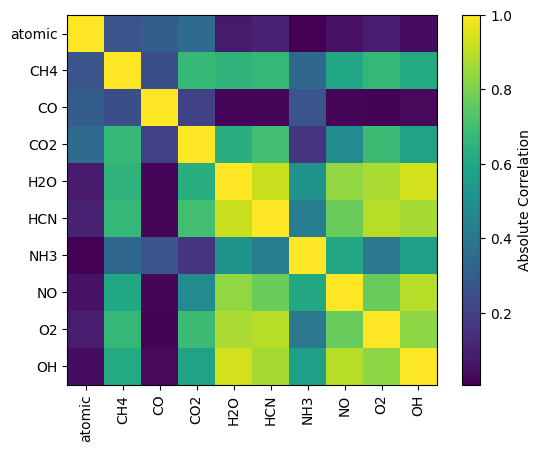

In [8]:
data = []
species = ['atomic', 'CH4', 'CO', 'CO2', 'H2O', 'HCN', 'NH3', 'NO', 'O2', 'OH']
for i, row in df.iterrows():
    fluxes = []
    for specie in species:
        fluxes.append(total_flux(row[f'FLiTs {specie} Wavelength'], row[f'FLiTs {specie} Flux']))
    data.append(fluxes)
df_FLiTs_flux = pd.DataFrame(data, columns=species)
print(df_FLiTs_flux.corr(method='kendall').round(2))
plt.imshow(abs(df_FLiTs_flux.corr(method='kendall')), cmap=plt.get_cmap("viridis")) # method='kendall'
plt.xticks(ticks=np.arange(len(species)), labels=species, rotation=90)
plt.yticks(ticks=np.arange(len(species)), labels=species)
plt.colorbar(label='Absolute Correlation')
plt.show()

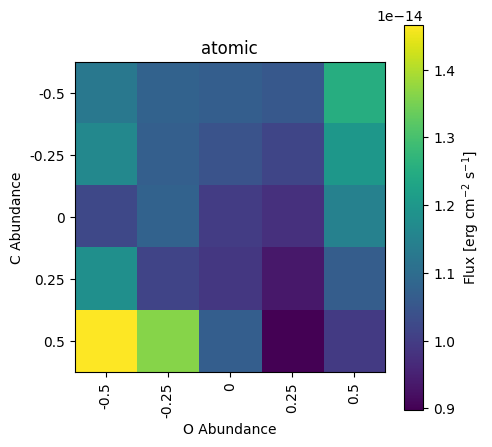

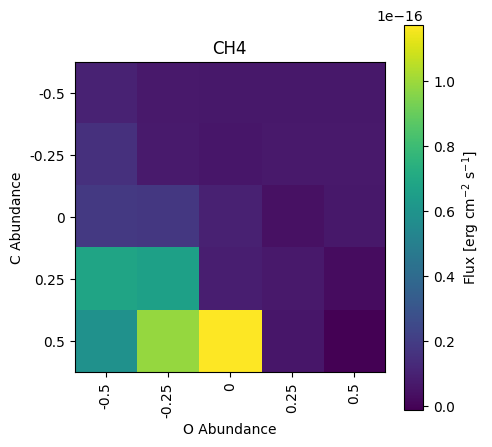

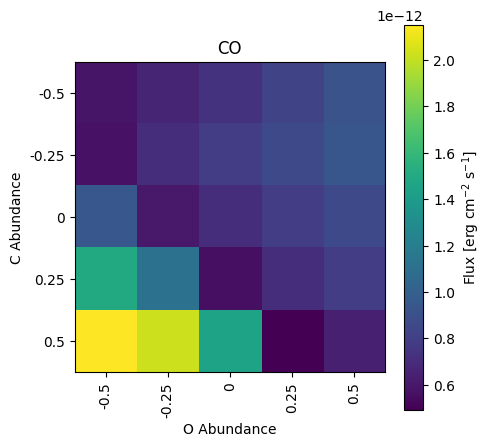

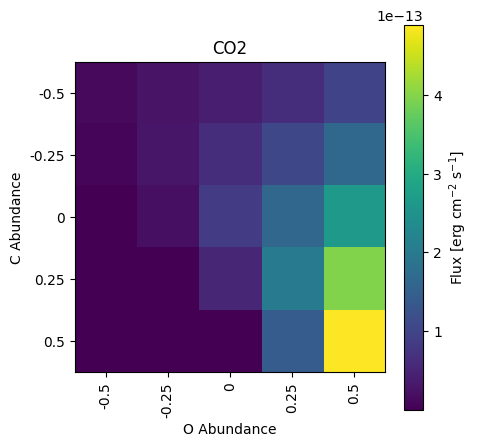

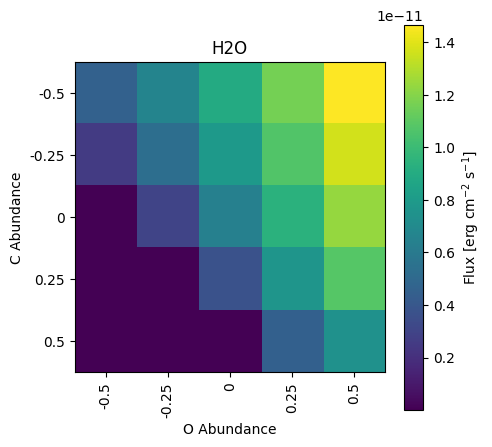

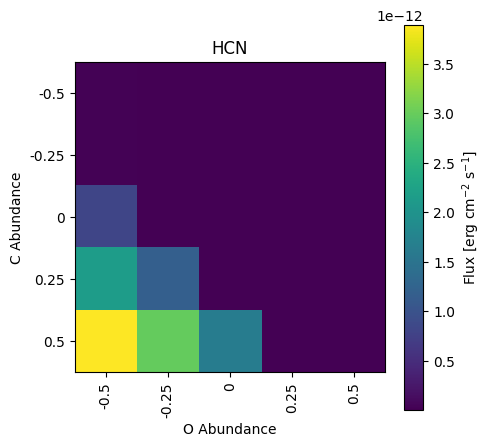

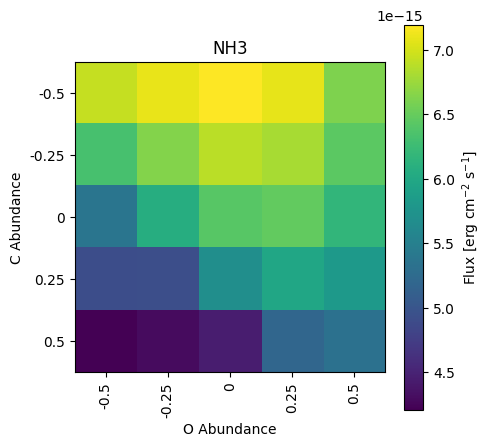

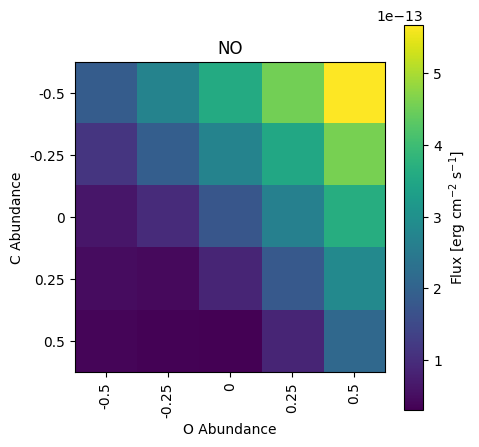

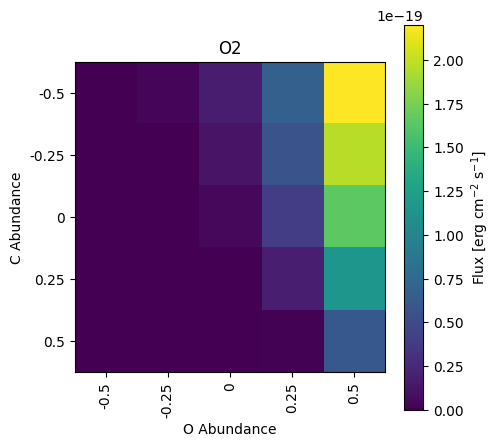

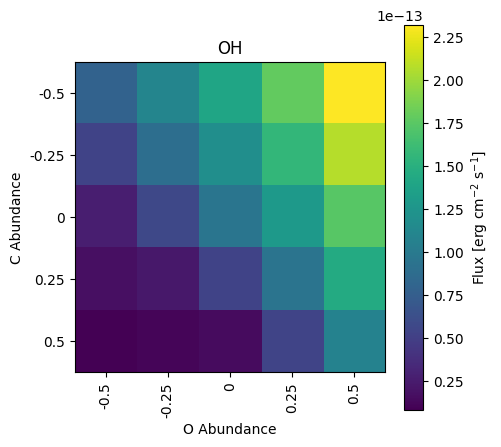

In [9]:

for specie in species:
    plt.figure(figsize=(5, 5))
    plt.imshow(df_FLiTs_flux[specie].values.reshape(5,5), cmap='viridis')
    plt.title(specie)
    plt.xticks(ticks=np.arange(5), labels=[-0.5, -0.25, 0, 0.25, 0.5], rotation=90)
    plt.yticks(ticks=np.arange(5), labels=[-0.5, -0.25, 0, 0.25, 0.5])
    plt.xlabel('O Abundance')
    plt.ylabel('C Abundance')
    plt.colorbar(label='Flux [erg cm$^{-2}$ s$^{-1}$]')
    # plt.savefig(f'Flux_{specie}.png')
    plt.show()

In [10]:
for index, specie_1 in enumerate(species):
    for specie_2 in species[index+1:]:
        df_FLiTs_flux[f'{specie_1}/{specie_2}'] =df_FLiTs_flux[specie_1]/df_FLiTs_flux[specie_2]
df_FLiTs_flux['C Abun'] = df['C Value'].astype(float)
df_FLiTs_flux['O Abun'] = df['O Value'].astype(float)
df_FLiTs_flux['C/O Ratio'] = df['CO Value'].astype(float)
print(df_FLiTs_flux.corr().round(2))
# plt.imshow(abs(df_FLiTs_flux.corr()), cmap=plt.get_cmap("viridis")) # method='kendall'
# plt.xticks(ticks=np.arange(len(df_FLiTs_flux.columns)), labels=df_FLiTs_flux.columns, rotation=90)
# plt.yticks(ticks=np.arange(len(df_FLiTs_flux.columns)), labels=df_FLiTs_flux.columns)
# plt.colorbar(label='Absolute Correlation')
# plt.show()

            atomic   CH4    CO   CO2   H2O   HCN   NH3    NO    O2    OH  ...  \
atomic        1.00  0.44  0.75 -0.29 -0.15  0.70 -0.31 -0.01  0.21 -0.09  ...   
CH4           0.44  1.00  0.81 -0.45 -0.68  0.81 -0.76 -0.59 -0.33 -0.65  ...   
CO            0.75  0.81  1.00 -0.31 -0.45  0.96 -0.70 -0.35 -0.09 -0.43  ...   
CO2          -0.29 -0.45 -0.31  1.00  0.54 -0.38  0.05  0.35  0.50  0.46  ...   
H2O          -0.15 -0.68 -0.45  0.54  1.00 -0.65  0.69  0.95  0.80  0.99  ...   
HCN           0.70  0.81  0.96 -0.38 -0.65  1.00 -0.79 -0.56 -0.30 -0.63  ...   
NH3          -0.31 -0.76 -0.70  0.05  0.69 -0.79  1.00  0.73  0.27  0.72  ...   
NO           -0.01 -0.59 -0.35  0.35  0.95 -0.56  0.73  1.00  0.80  0.98  ...   
O2            0.21 -0.33 -0.09  0.50  0.80 -0.30  0.27  0.80  1.00  0.83  ...   
OH           -0.09 -0.65 -0.43  0.46  0.99 -0.63  0.72  0.98  0.83  1.00  ...   
atomic/CH4    0.02 -0.15 -0.09 -0.32  0.28 -0.17  0.37  0.28  0.17  0.28  ...   
atomic/CO    -0.43 -0.72 -0.

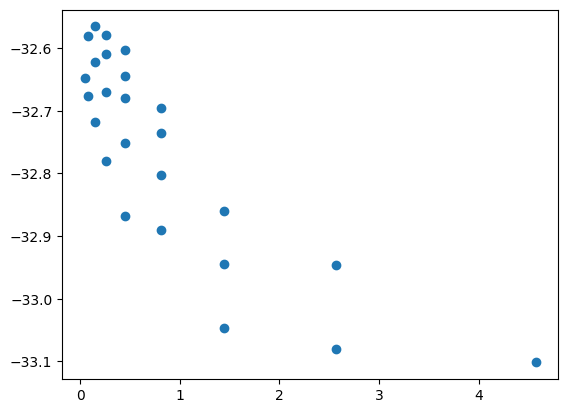

In [11]:
plt.scatter(df_FLiTs_flux['C/O Ratio'], np.log(df_FLiTs_flux['NH3']))
plt.show()

READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.5_CO_0.45\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.25_CO_0.2570\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.0_CO_0.145\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.25_CO_0.0813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.5_CO_0.045\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.25_O_-0.5_CO_0.813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.25_O_-0.25_CO_0.45\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.25_O_0.0_CO_0.257\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.25_O_0.25_CO_0.145\specFLiTs1_NH3.out  ...
INFO: 

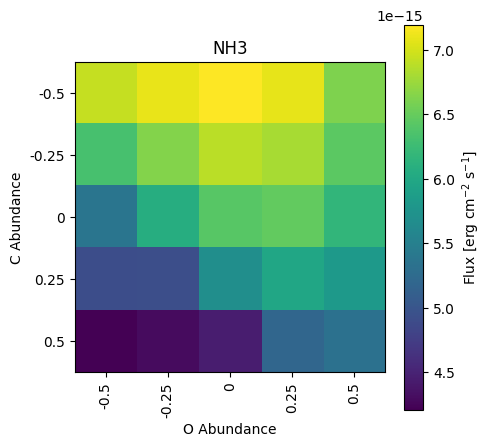

In [12]:
specie = 'NH3'
total = []
for model in df['Model Name']:
    specie_flits = pread.read_FLiTs(f'gdr_1000_N/{model}', filename=f'specFLiTs1_{specie}.out')
    wl, flux, flux_cont = specie_flits.convolve(3000, contReturn=True)
    flux -= flux_cont
    total.append(total_flux(wl, flux))
    # plt.plot(wl, flux)
    # plt.title(total[-1])
    # plt.show()
plt.figure(figsize=(5, 5))
plt.imshow(np.asarray(total).reshape(5,5), cmap='viridis')
plt.title(specie)
plt.xticks(ticks=np.arange(5), labels=[-0.5, -0.25, 0, 0.25, 0.5], rotation=90)
plt.yticks(ticks=np.arange(5), labels=[-0.5, -0.25, 0, 0.25, 0.5])
plt.xlabel('O Abundance')
plt.ylabel('C Abundance')
plt.colorbar(label='Flux [erg cm$^{-2}$ s$^{-1}$]')
plt.savefig(f'Flux_{specie}.png')
plt.show()

READ: Reading File:  gdr_1000_N/C_-0.5_O_0.0_CO_0.145\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.0_CO_0.145\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


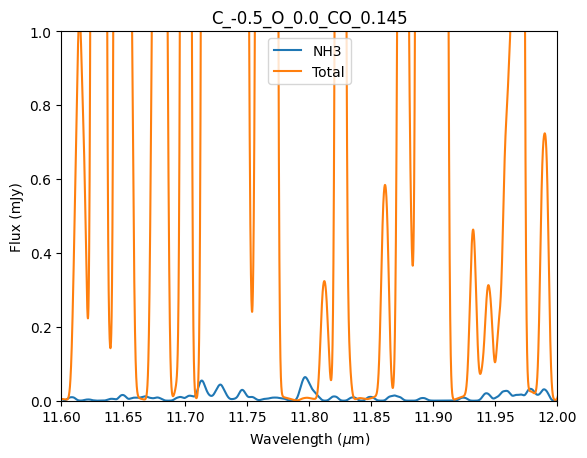

In [13]:
model_index = 2
total_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1.out')
total_wl, tot_flux, total_flux_cont = total_flits.convolve(3000, contReturn=True)
tot_flux -= total_flux_cont
NH3_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1_NH3.out')
NH3_wl, NH3_flux, NH3_flux_cont = NH3_flits.convolve(3000, contReturn=True)
NH3_flux -= NH3_flux_cont
plt.plot(NH3_wl, NH3_flux*1000, label='NH3')
plt.plot(total_wl, tot_flux*1000, label='Total')
# plt.xlim(5, 7)
plt.xlim(11.6, 12)
plt.ylim(0,1)
plt.title(df['Model Name'][model_index])
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Flux (mJy)')
plt.legend()
plt.show()

READ: Reading File:  gdr_1000_N/C_0.25_O_-0.5_CO_2.570\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_0.25_O_-0.5_CO_2.570\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


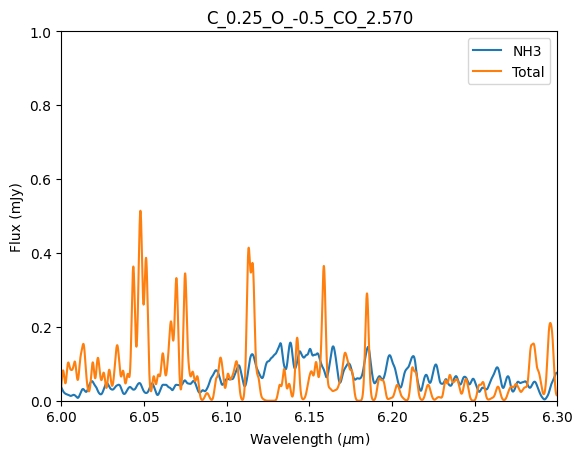

In [14]:
model_index = 15
total_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1.out')
total_wl, tot_flux, total_flux_cont = total_flits.convolve(3000, contReturn=True)
tot_flux -= total_flux_cont
NH3_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1_NH3.out')
NH3_wl, NH3_flux, NH3_flux_cont = NH3_flits.convolve(3000, contReturn=True)
NH3_flux -= NH3_flux_cont
plt.plot(NH3_wl, NH3_flux*1000, label='NH3')
plt.plot(total_wl, tot_flux*1000, label='Total')
plt.xlim(6, 6.3)
# plt.xlim(11.6, 12)
plt.ylim(0,1)
plt.title(df['Model Name'][model_index])
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Flux (mJy)')
plt.legend()
plt.show()

READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.5_CO_0.45\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.5_CO_0.45\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.25_CO_0.2570\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.25_CO_0.2570\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.0_CO_0.145\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.0_CO_0.145\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.25_CO_0.0813\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.25_CO_0.0813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.5_CO_0.045\specFLiTs1.out  ...
INFO: convolve FLiTs spectru

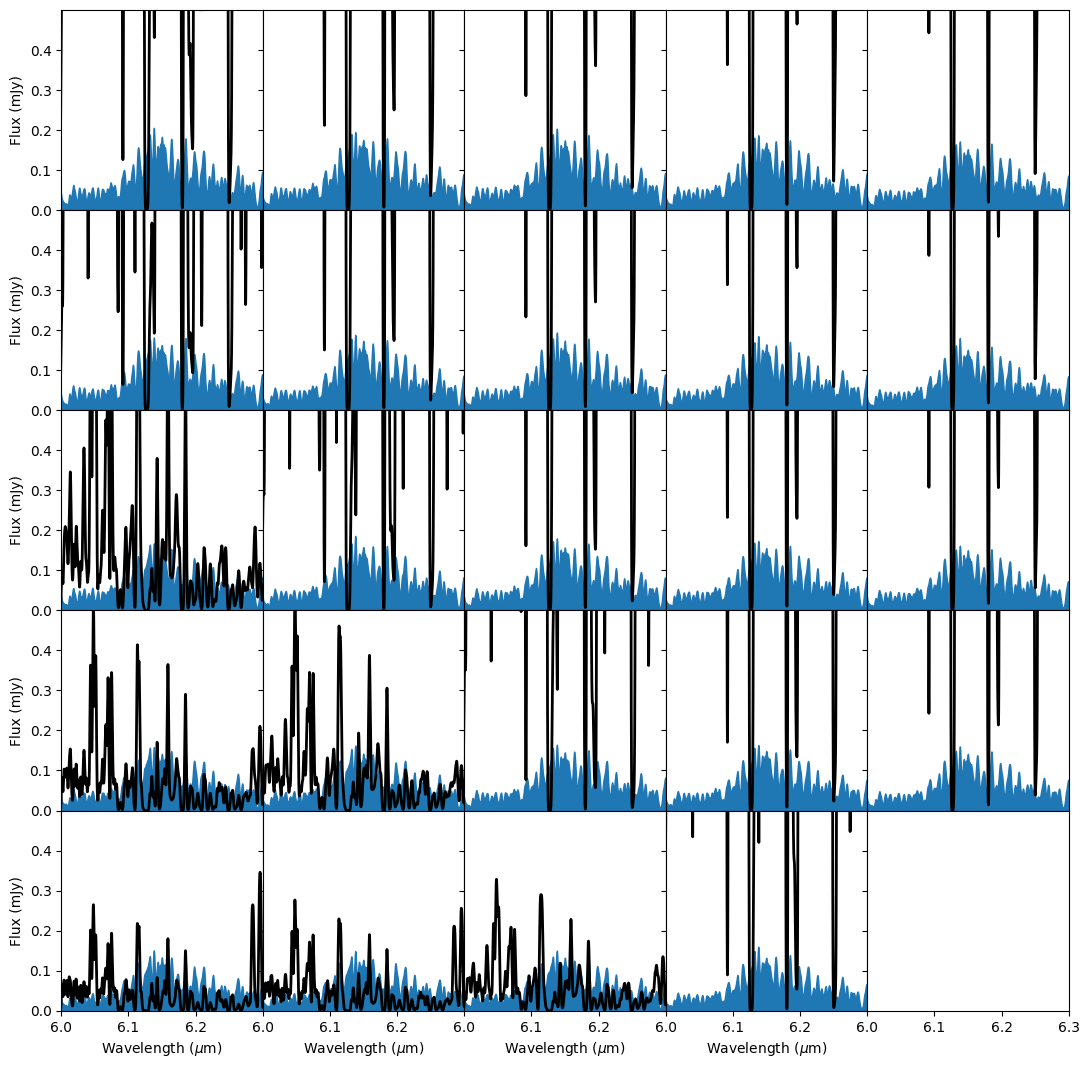

In [15]:
species =['NH3']
fig = plt.figure(figsize=(13, 13))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row').flatten()
xrange=[6, 6.3]
yrange=[0,0.5]
num_xticks = 4
num_yticks = 6
total_spec= None
for model_index in range(24):
    n_row, n_col = divmod(model_index, 5)
    total_spec = None
    # fig, ax = plt.subplots(figsize=(14, 5))
    total_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1.out')
    total_wl, tot_flux, total_flux_cont = total_flits.convolve(3000, contReturn=True)
    tot_flux -= total_flux_cont
    for index, specie in enumerate(species):
        NH3_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1_NH3.out')
        NH3_wl, NH3_flux, NH3_flux_cont = NH3_flits.convolve(3000, contReturn=True)
        NH3_flux -= NH3_flux_cont
        # new_specie_flux = np.interp(total_wl, NH3_wl, NH3_flux, left=0, right=0)
        # if total_spec is None:
        #     total_spec = new_specie_flux
        # else:
        #     total_spec += new_specie_flux
        axes[model_index].fill_between(NH3_wl, 0, NH3_flux*1000, label=specie, zorder=len(species) - index+1,
                        color=cmap(index / len(species)))
        # ax.fill_between(specie_wl,0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
        #                 color=cmap(index / len(species)))
        # new_flux = np.interp(FLiTs_wl, specie_wl, specie_flux)
        # ax.plot(FLiTs_wl, np.log10(new_flux/FLiTs_flux+1))
        # axes[i].plot(FLiTs_wl, new_specie_flux*1000)
    axes[model_index].plot(total_wl, tot_flux*1000, c='black', lw=2, label='FLiTs', zorder=20)
    # ax.plot(specie_wl, specie_flux)
    # ax.plot(total_FLiTs_wl, interp_flux*1000, color='grey', zorder=30)
    # fig.suptitle(model)
    axes[model_index].set_xlim(xrange)
    axes[model_index].set_ylim(yrange)
    if n_col == 0:
        axes[model_index].set_ylabel("Flux (mJy)")
        axes[model_index].set_yticks(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
        axes[model_index].set_yticklabels(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
    if n_row == 4:
        axes[model_index].set_xlabel(r"Wavelength ($\mu$m)")
        axes[model_index].set_xticks(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
        axes[model_index].set_xticklabels(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
# plt.legend()
plt.show()

READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.5_CO_0.45\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.5_CO_0.45\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.25_CO_0.2570\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_-0.25_CO_0.2570\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.0_CO_0.145\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.0_CO_0.145\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.25_CO_0.0813\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.25_CO_0.0813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_-0.5_O_0.5_CO_0.045\specFLiTs1.out  ...
INFO: convolve FLiTs spectru

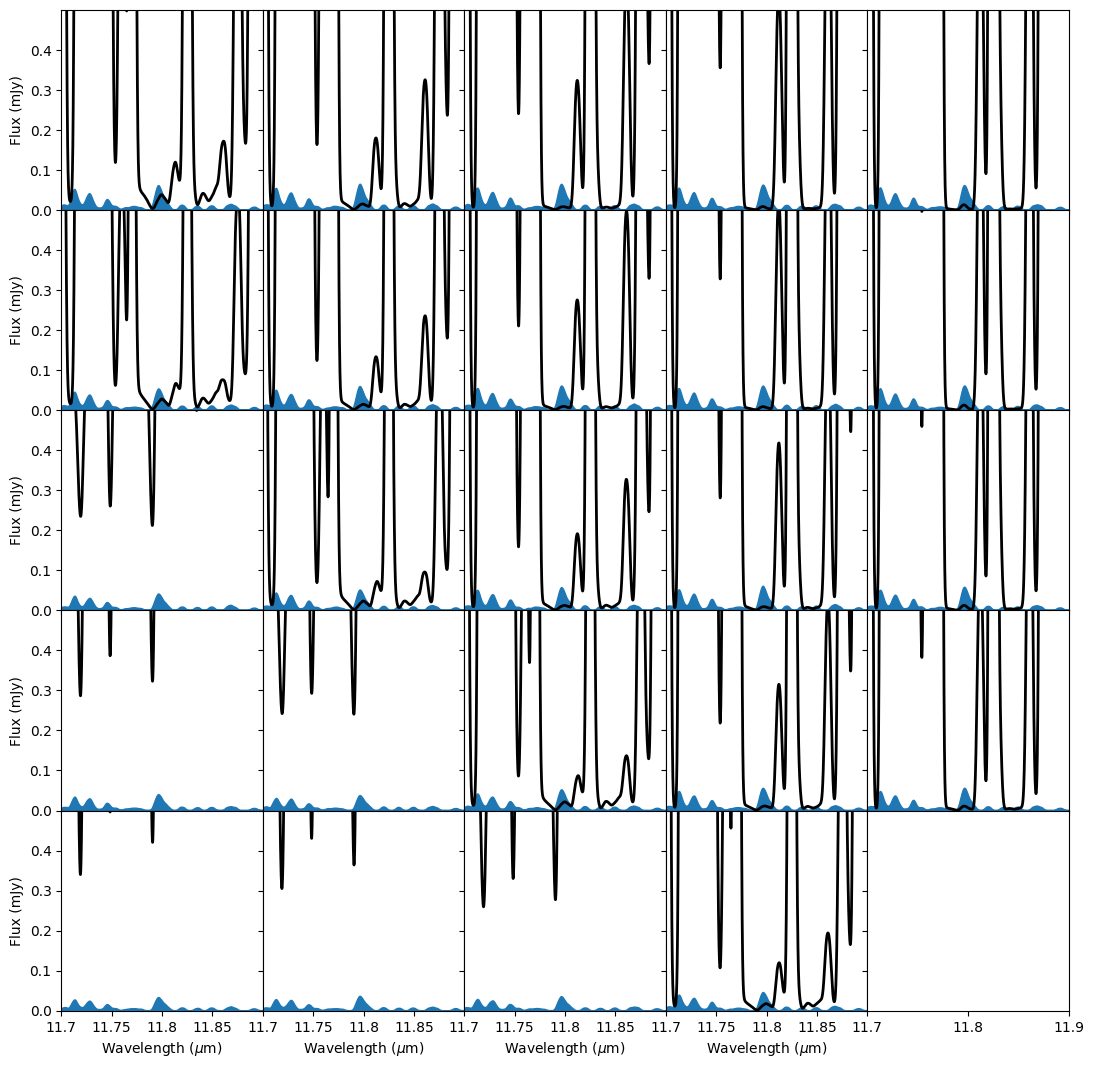

In [16]:
species =['NH3']
fig = plt.figure(figsize=(13, 13))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row').flatten()
xrange=[11.7, 11.9]
yrange=[0,0.5]
num_xticks = 5
num_yticks = 6
total_spec= None
for model_index in range(24):
    n_row, n_col = divmod(model_index, 5)
    total_spec = None
    # fig, ax = plt.subplots(figsize=(14, 5))
    total_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1.out')
    total_wl, tot_flux, total_flux_cont = total_flits.convolve(3000, contReturn=True)
    tot_flux -= total_flux_cont
    for index, specie in enumerate(species):
        NH3_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1_NH3.out')
        NH3_wl, NH3_flux, NH3_flux_cont = NH3_flits.convolve(3000, contReturn=True)
        NH3_flux -= NH3_flux_cont
        # new_specie_flux = np.interp(total_wl, NH3_wl, NH3_flux, left=0, right=0)
        # if total_spec is None:
        #     total_spec = new_specie_flux
        # else:
        #     total_spec += new_specie_flux
        axes[model_index].fill_between(NH3_wl, 0, NH3_flux*1000, label=specie, zorder=len(species) - index+1,
                        color=cmap(index / len(species)))
        # ax.fill_between(specie_wl,0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
        #                 color=cmap(index / len(species)))
        # new_flux = np.interp(FLiTs_wl, specie_wl, specie_flux)
        # ax.plot(FLiTs_wl, np.log10(new_flux/FLiTs_flux+1))
        # axes[i].plot(FLiTs_wl, new_specie_flux*1000)
    axes[model_index].plot(total_wl, tot_flux*1000, c='black', lw=2, label='FLiTs', zorder=20)
    # ax.plot(specie_wl, specie_flux)
    # ax.plot(total_FLiTs_wl, interp_flux*1000, color='grey', zorder=30)
    # fig.suptitle(model)
    axes[model_index].set_xlim(xrange)
    axes[model_index].set_ylim(yrange)
    if n_col == 0:
        axes[model_index].set_ylabel("Flux (mJy)")
        axes[model_index].set_yticks(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
        axes[model_index].set_yticklabels(np.linspace(yrange[0] * 100, yrange[1] * 100, num_yticks, dtype=int)[:-1] / 100)
    if n_row == 4:
        axes[model_index].set_xlabel(r"Wavelength ($\mu$m)")
        axes[model_index].set_xticks(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
        axes[model_index].set_xticklabels(np.linspace(xrange[0] * 100, xrange[1] * 100, num_xticks, dtype=int)[:-1] / 100)
# plt.legend()
plt.show()

READ: Reading File:  gdr_1000_N/C_0.5_O_-0.5_CO_4.57\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_1000_N/C_0.5_O_-0.5_CO_4.57\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


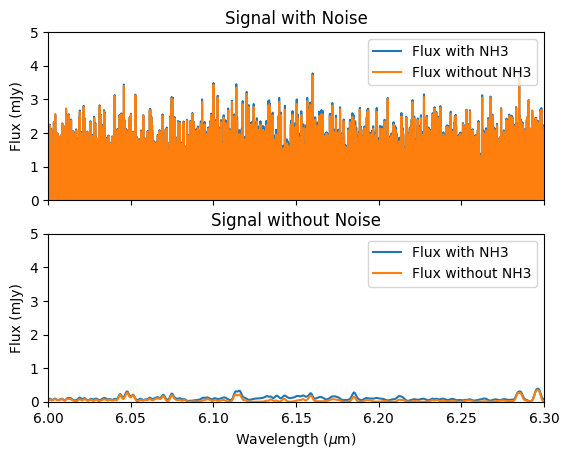

In [38]:

def add_noise(flux, SNR):
    """
    SNR = flux/sigma
    """
    noise_level = np.min(flux) / SNR
    noise = np.random.normal(0, noise_level, size=flux.shape)
    return flux + noise


model_index = 20
model_flits = pread.read_FLiTs('gdr_1000_N/' + df['Model Name'][model_index], filename='specFLiTs1.out')
wl, flux, flux_cont = model_flits.convolve(3000, contReturn=True)

NH3_flits = pread.read_FLiTs(f'gdr_1000_N/{df['Model Name'][model_index]}', filename=f'specFLiTs1_NH3.out')
NH3_wl, NH3_flux, NH3_flux_cont = NH3_flits.convolve(3000, contReturn=True)

total_flux = flux + np.interp(wl, NH3_wl, NH3_flux - NH3_flux_cont)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
np.random.seed(42)
noise_flux = add_noise(total_flux, 300)
ax1.plot(wl, (noise_flux - flux_cont) * 1000, label='Flux with NH3')
np.random.seed(42)
noise_flux = add_noise(flux, 300)
ax1.plot(wl, (noise_flux - flux_cont) * 1000, label='Flux without NH3')
ax1.set_title('Signal with Noise')
ax1.set_ylabel('Flux (mJy)')
ax1.set_xlim(6, 6.3)
ax1.set_ylim(0, 5)
ax1.legend()
ax2.plot(wl, (total_flux - flux_cont) * 1000, label='Flux with NH3')
ax2.plot(wl, (flux - flux_cont) * 1000, label='Flux without NH3')
ax2.set_title('Signal without Noise')
ax2.set_xlabel(R'Wavelength ($\mu$m)')
ax2.set_ylabel('Flux (mJy)')
ax2.legend()
plt.show()

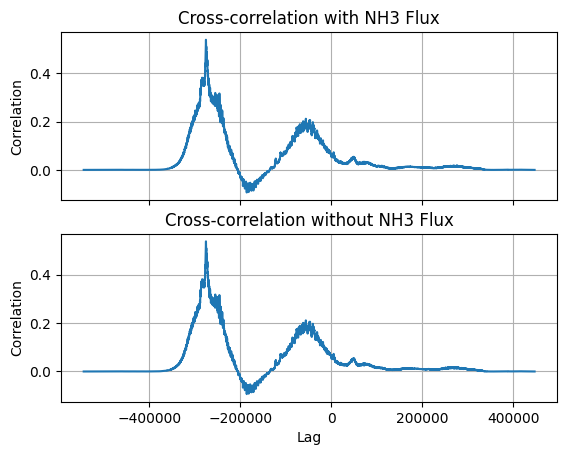

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

np.random.seed(42)
noise_flux = add_noise(total_flux, 300)
cc1 = np.correlate((NH3_flux - NH3_flux_cont), (noise_flux - flux_cont), mode='full')
lags = np.arange(-len(noise_flux)+1, len(NH3_flux))
ax1.plot(lags, cc1)
ax1.set_title("Cross-correlation with NH3 Flux")
ax1.set_ylabel("Correlation")
ax1.grid(True)

np.random.seed(42)
noise_flux = add_noise(flux, 300)
cc2 = np.correlate((NH3_flux - NH3_flux_cont), (noise_flux - flux_cont), mode='full')
lags = np.arange(-len(noise_flux)+1, len(NH3_flux))
ax2.plot(lags, cc2)
ax2.set_title("Cross-correlation without NH3 Flux")
ax2.set_xlabel("Lag")
ax2.set_ylabel("Correlation")
ax2.grid(True)
plt.show()

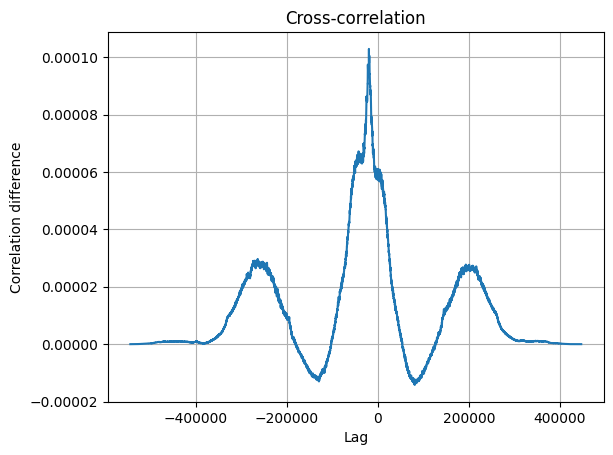

In [39]:
plt.plot(lags, cc1-cc2)
plt.title("Cross-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation difference")
plt.grid(True)
plt.show()